Exploratory Data Analysis: Pokemon


Introduction:

Welcome! to my Exploratory Data Analysis project on Pokémon.
Pokémon for me growing up was a huge part of my childhood and in many ways, I always sought to be better at the game. One of the many ways I strived to be a better Pokémon trainer included learning and exploring the games internal data values. These values were originally hidden from the player but could be hinted at which category they fell into by a particular in game character. Furthermore, numerically out of the six statistical categories a Pokémon possessed they are allowed 0 - 31 of these values per stat they are known as IV's (Individual Values) IV's are similar to innate potential and represent the potential for that respective attribute.

 Moreover, there was another semi-hidden value these are known as EV’s (Effort Values) and unlike the later these values are not distributed via birth but allotted from training. Developing that particular attribute of the Pokémon increases these values, they range from 0 - 252 per stat with a total investment per Pokémon of 510.
 
I seek with this project to provide insights on the Pokémon with high value attributes and show why you should invest into them when considering building a team. I ultimately would like to perform machine learning on the EV distribution onto those attributes to show which of them are worth investing into. Also to run a classification algorithms such as logistic regression and or random forest to predict which pokemon is which an homage to the classic commericial Transition from the pokemon t.v show.

see link: https://www.youtube.com/watch?v=gOLXYAlC-R8
 
 
Frame the Problem:

•	What Pokémon type has the highest average base stat across each generation, based off primary types? e.g. (Fire Types are dominate in Gen 1)

•	What Pokémon type has the highest average base stat across each generation, based off secondary types? e.g. (Water Types are dominate in Gen 2)

•	What category does that Pokémon fall into? e.g. (Normal, Mythical, Legendary)

•	What is the highest stat for each generation? 

•	What stat is the primary per type?

•	What Key features determine a legendary Pokémon?

•	What key features can determine a type?

•	Can you predict that Pokémon consistently with the features provided?


In [130]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [131]:
pokedex = pd.read_csv('/Users/jtc/Desktop/hello_ds/pokedex_(Update_05.20).csv')

In [132]:
pokedex.head()
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


INSIGHT NOTE:

Here I check the dataframe and evalute the columns.
I notice that some of them i don't need to solve the 
above listed questions so I need to clean the data 
and make some adjustments that allow me to have a 
more concise dataset.

- I'm going to remove those columns I don't need to clean up my data.

In [133]:
remove_columns = ['german_name','japanese_name','species','type_number','abilities_number','ability_1',
               'ability_2','ability_hidden','percentage_male','egg_cycles','against_normal','against_fire',
               'against_water','against_electric','against_grass','against_ice','against_fight',
              'against_poison','against_ground','against_flying','against_psychic','against_bug',
              'against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy']
pokedex = pokedex.drop(remove_columns, axis = 1)

INSIGHT NOTE:

Here after removing those columns, I see that to begin to answer my 1st question

- I want to check for particular types of the pokemon and their generation

For example: All Grass types in Gen 1.

After selecting them I want to calculate the average total points.

 - This is essential the base stat of a pokemon, meaning it is the 
   total of all their cumulative stat points. 

Here is pikachu's standard stat spread for example:

Health Points: 35
Attack: 55
Defense: 40
Special Attack: 50
Special Defense: 50 
Speed: 90
Total: 320 < -- this is the total_points I will often call this 'base stat'.

In [134]:
# Group By Method to join type 1 (primary type) and generation juxtapose to total points
# to compare across gen.

type1_avg = pokedex.groupby(['type_1','generation'])['total_points'].mean()
type2_avg = pokedex.groupby(['type_2','generation'])['total_points'].mean()


INSIGHT NOTE:

Here I take those grouped features and I organize them to be plotted

- In this plot I focus on primary type, this is the first type the pokemon
  has and their average base stat.

For example: A pokemon might have one type or two types.

- Types can vary for that pokemon depending on region and 
  ability but here we are focusing on just that first type
  that pokemon can have.
  



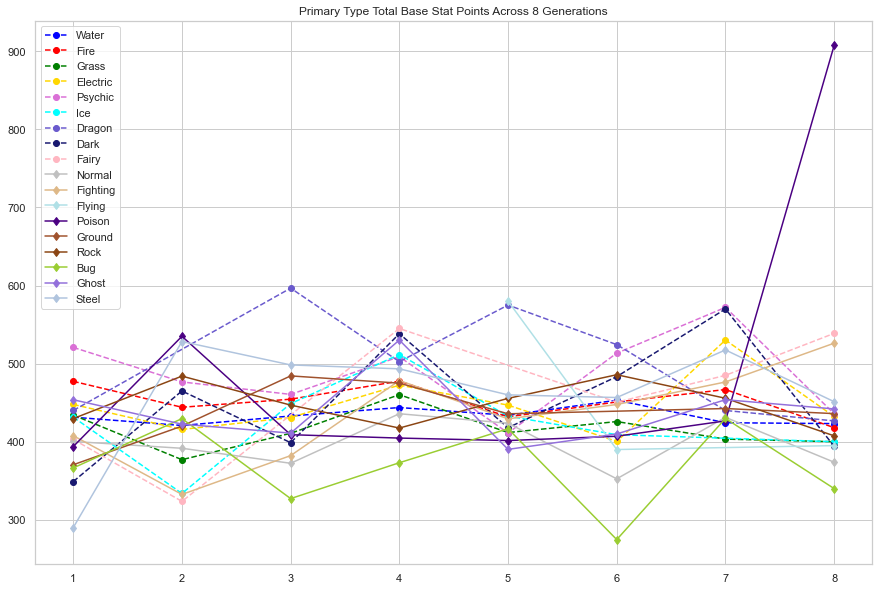

In [135]:
fig = plt.figure(figsize=(15,10))

plt.title('Primary Type Total Base Stat Points Across 8 Generations')

plt.plot(type1_avg.Water, color='blue', linestyle='dashed', marker='o', label='Water')

plt.plot(type1_avg.Fire, color='red', linestyle='dashed', marker='o', label='Fire')

plt.plot(type1_avg.Grass, color='green', linestyle='dashed', marker='o', label='Grass')

plt.plot(type1_avg.Electric, color='gold', linestyle='dashed', marker='o', label='Electric')

plt.plot(type1_avg.Psychic, color='orchid', linestyle='dashed', marker='o', label='Psychic')

plt.plot(type1_avg.Ice, color='cyan', linestyle='dashed', marker='o', label='Ice')

plt.plot(type1_avg.Dragon, color='slateblue', linestyle='dashed', marker='o', label='Dragon')

plt.plot(type1_avg.Dark, color='midnightblue', linestyle='dashed', marker='o', label='Dark')

plt.plot(type1_avg.Fairy, color='lightpink', linestyle='dashed', marker='o', label='Fairy' )

plt.plot(type1_avg.Normal, color='silver', linestyle='solid', marker='d', label='Normal')

plt.plot(type1_avg.Fighting, color='burlywood', linestyle='solid', marker='d', label='Fighting')

plt.plot(type1_avg.Flying, color='powderblue', linestyle='solid', marker='d', label='Flying')

plt.plot(type1_avg.Poison, color='indigo', linestyle='solid', marker='d', label='Poison')

plt.plot(type1_avg.Ground, color='sienna', linestyle='solid', marker='d', label='Ground')

plt.plot(type1_avg.Rock, color='saddlebrown', linestyle='solid', marker='d', label='Rock')

plt.plot(type1_avg.Bug,  color='yellowgreen', linestyle='solid', marker='d', label='Bug')

plt.plot(type1_avg.Ghost,  color='mediumpurple', linestyle='solid', marker='d', label='Ghost')

plt.plot(type1_avg.Steel,  color='lightsteelblue', linestyle='solid', marker='d', label='Steel')

plt.legend(loc="upper left")



INSIGHT NOTE:

After Evaluation you can see that most of the mean data lies within 300 - 600.

- However you can see a massive outlier of over 900 for poison types.

Lets look into how many pokemon in that generation (gen 8) 
have poison as their primary type.


In [136]:
total_type1_per_gen = pokedex.groupby(['type_1','generation'])['type_1'].count()
total_type2_per_gen = pokedex.groupby(['type_2','generation'])['type_1'].count()

gen_1 = total_type1_per_gen.Psychic
print(gen_1)
gen_2 = total_type1_per_gen.Poison
print(gen_2)
gen_3 = total_type1_per_gen.Dragon
print(gen_3)
gen_4 = total_type1_per_gen.Fairy
print(gen_4)
gen_5 = total_type1_per_gen.Flying
print(gen_5)
gen_6 = total_type1_per_gen.Dragon
print(gen_6)
gen_7 = total_type1_per_gen.Psychic
print(gen_7)
gen_8 = total_type1_per_gen.Poison 
print(gen_8)

generation
1    14
2     7
3    12
4     8
5    14
6     5
7    10
8     6
Name: type_1, dtype: int64
generation
1    17
2     1
3     3
4     6
5     2
6     2
7     6
8     2
Name: type_1, dtype: int64
generation
1     3
3    12
4     4
5     9
6     6
7     3
8     3
Name: type_1, dtype: int64
generation
1    2
2    5
4    1
6    9
7    1
8    4
Name: type_1, dtype: int64
generation
5    2
6    2
8    4
Name: type_1, dtype: int64
generation
1     3
3    12
4     4
5     9
6     6
7     3
8     3
Name: type_1, dtype: int64
generation
1    14
2     7
3    12
4     8
5    14
6     5
7    10
8     6
Name: type_1, dtype: int64
generation
1    17
2     1
3     3
4     6
5     2
6     2
7     6
8     2
Name: type_1, dtype: int64


INSIGHT NOTE:

Here we can see the totals for the number of pokemon in each gen.
Now lets use those findings for those type 1 pokemon and see how 
many are in that gen and their percentage represented.


- 14 Psychic types
- 1 Poison type
- 12 Dragon types
- 1 Fairy type
- 2 Flying types
- 6 Dragon types
- 3 Psychic types
- 2 Poison types

INSIGHT NOTE:

When returning to the question, how many pokemon in generation (gen 8) have poison as their primary type ?
- Only two pokemon ! 
- That means one of them must have a massive base stat.

Lets see who that pokemon is.

In [137]:
whose_that_pokemon = pokedex.total_points.idxmax()
pokedex.loc[whose_that_pokemon,:]

Unnamed: 0                        1027
pokedex_number                     890
name               Eternatus Eternamax
generation                           8
status                       Legendary
type_1                          Poison
type_2                          Dragon
height_m                           100
weight_kg                          NaN
total_points                      1125
hp                                 255
attack                             115
defense                            250
sp_attack                          125
sp_defense                         250
speed                              130
catch_rate                         NaN
base_friendship                    NaN
base_experience                    NaN
growth_rate                       Slow
egg_type_number                      1
egg_type_1                Undiscovered
egg_type_2                         NaN
Name: 1027, dtype: object

INSIGHT NOTE:

A whopping base stat of 1125 ! ( total_points ) 

That is incredible, and a massive outlier.
However we can see that only two pokemon 
in gen 8 are represented with poison as their
primary type. 

- lets see who the other pokemon is.

In [138]:
pokedex.where(pokedex['type_1'] == 'Poison')

,Unnamed: 0,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,total_points,...,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1026,1026.0,890.0,Eternatus,8.0,Legendary,Poison,Dragon,20.0,950.0,690.0,...,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1.0,Undiscovered,NaN


INSIGHT NOTE:
    
Wow ! it was Eternatus in it's base form with a base stat of 690.
So this means that in Gen 8 Eternatus represents 100% of all 
the data for type 1 poison pokemon. 

When evaluting data per generation is not an anomaly or an outlier
when evaluating type 1 poison pokemon across all gens the 1125 base stat
does become a major outlier but in this case. This pokemon represents
all the data and removing it would leave us with nothing.

--------------------
When returning to the framed questions we can begin to answer the first.

• What Pokémon type has the highest average base stat across each generation, based off primary types? 

- Generation 1: Psychic

- Generation 2: Poison

- Generation 3: Dragon

- Generation 4: Fairy

- Generation 5: Flying

- Generation 6: Dragon

- Generation 7: Psychic

- Generation 8: Poison

INSIGHT NOTE:

Upon first look we can see those above listed types appear to be dominate across those 
respective generations, however lets begin to dig more deeper into how many of that 
type 1 pokemon are represented in that generation compared to the total amount of 
pokemon in that generation.

In [139]:
# Count the number of Pokemon in each generation to be able to compare to the number of pokemon that represent 
# Type 1 and Type 2.


# -- Generation 1

pkmn_gen1 = pokedex.apply(lambda x: True if x['generation'] == 1 else False , axis=1)

numOfRows = len(pkmn_gen1[pkmn_gen1 == True].index)

print('Number of Pokemon in Generation 1 : ', numOfRows)

# -- Generation 2 

pkmn_gen2 = pokedex.apply(lambda x: True if x['generation'] == 2 else False , axis=1)

numOfRows = len(pkmn_gen2[pkmn_gen2 == True].index)

print('Number of Pokemon in Generation 2 : ', numOfRows)

# -- Generation 3

pkmn_gen3 = pokedex.apply(lambda x: True if x['generation'] == 3 else False , axis=1)

numOfRows = len(pkmn_gen3[pkmn_gen3 == True].index)

print('Number of Pokemon in Generation 3 : ', numOfRows)

# -- Generation 4

pkmn_gen4 = pokedex.apply(lambda x: True if x['generation'] == 4 else False , axis=1)

numOfRows = len(pkmn_gen4[pkmn_gen4 == True].index)

print('Number of Pokemon in Generation 4 : ', numOfRows)

# -- Generation 5

pkmn_gen5 = pokedex.apply(lambda x: True if x['generation'] == 5 else False , axis=1)

numOfRows = len(pkmn_gen5[pkmn_gen5 == True].index)

print('Number of Pokemon in Generation 5 : ', numOfRows)

# -- Generation 6

pkmn_gen6 = pokedex.apply(lambda x: True if x['generation'] == 6 else False , axis=1)

numOfRows = len(pkmn_gen6[pkmn_gen6 == True].index)

print('Number of Pokemon in Generation 6 : ', numOfRows)

# -- Generation 7

pkmn_gen7 = pokedex.apply(lambda x: True if x['generation'] == 7 else False , axis=1)

numOfRows = len(pkmn_gen7[pkmn_gen7 == True].index)

print('Number of Pokemon in Generation 7 : ', numOfRows)

# -- Generation 8

pkmn_gen8 = pokedex.apply(lambda x: True if x['generation'] == 8 else False , axis=1)

numOfRows = len(pkmn_gen8[pkmn_gen8 == True].index)

print('Number of Pokemon in Generation 8 : ', numOfRows)

Number of Pokemon in Generation 1 :  192
Number of Pokemon in Generation 2 :  107
Number of Pokemon in Generation 3 :  165
Number of Pokemon in Generation 4 :  121
Number of Pokemon in Generation 5 :  171
Number of Pokemon in Generation 6 :  85
Number of Pokemon in Generation 7 :  99
Number of Pokemon in Generation 8 :  88


<BarContainer object of 8 artists>

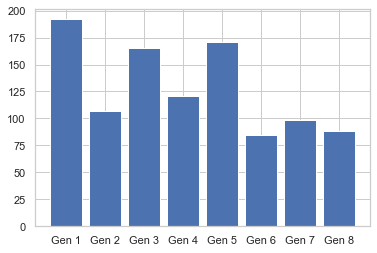

In [170]:

gens = ['Gen 1','Gen 2','Gen 3','Gen 4','Gen 5','Gen 6','Gen 7','Gen 8']
total_count_per_gen = [192, 107, 165, 121, 171, 85, 99, 88]
plt.bar(gens, total_count_per_gen, width = 0.8)


INSIGHT NOTE :

Ok so now we know how many of the apparent dominate type 1 pokemon represent those averages
lets see the percentage of pokemon that primary type represents.


- 14 Psychic types

- 1 Poison type

- 12 Dragon types

- 1 Fairy type

- 2 Flying types

- 6 Dragon types

- 3 Psychic types

- 2 Poison types



In [157]:
percentage_gen1_psychic = round((14/192)*100,2)
print(percentage_gen1_psychic)

percentage_gen2_poison = round((1/107)*100,2)
print(percentage_gen2_poison)

percentage_gen3_dragon = round((12/165)*100,2)
print(percentage_gen3_dragon)

percentage_gen4_fairy = round((1/121)*100,2)
print(percentage_gen4_fairy)

percentage_gen5_flying = round((2/171)*100,2)
print(percentage_gen5_flying)

percentage_gen6_dragon = round((6/85)*100,2)
print(percentage_gen6_dragon)

percentage_gen7_psychic = round((3/99)*100,2)
print(percentage_gen7_psychic)

percentage_gen8_poison = round((2/88)*100,2)
print(percentage_gen8_poison)



7.29
0.93
7.27
0.83
1.17
7.06
3.03
2.27


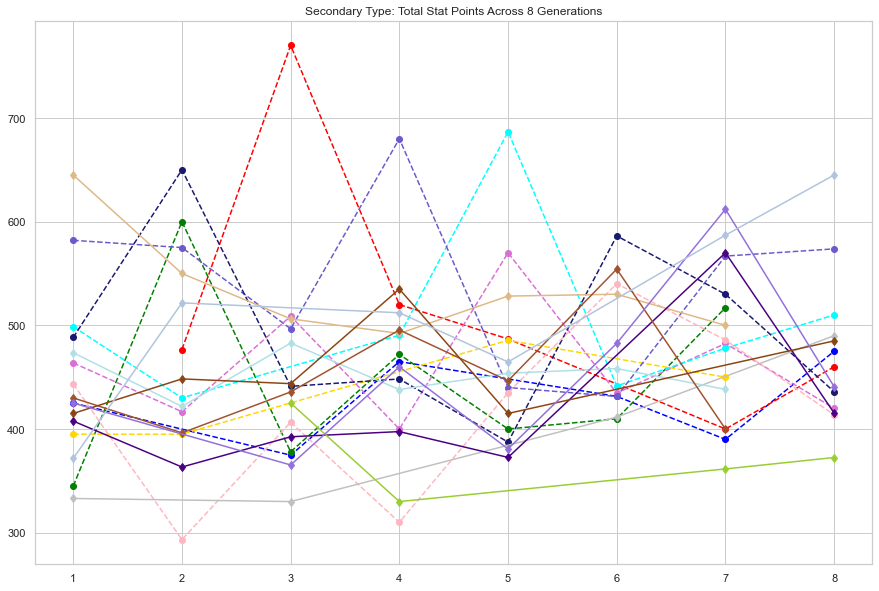

In [141]:
fig = plt.figure(figsize=(15,10))

plt.title('Secondary Type: Total Stat Points Across 8 Generations')

plt.plot(type2_avg.Water, color='blue', linestyle='dashed', marker='o', label='Water')

plt.plot(type2_avg.Fire, color='red', linestyle='dashed', marker='o', label='Fire')

plt.plot(type2_avg.Grass, color='green', linestyle='dashed', marker='o', label='Grass')

plt.plot(type2_avg.Electric, color='gold', linestyle='dashed', marker='o', label='Electric')

plt.plot(type2_avg.Psychic, color='orchid', linestyle='dashed', marker='o', label='Psychic')

plt.plot(type2_avg.Ice, color='cyan', linestyle='dashed', marker='o', label='Ice')

plt.plot(type2_avg.Dragon, color='slateblue', linestyle='dashed', marker='o', label='Dragon')

plt.plot(type2_avg.Dark, color='midnightblue', linestyle='dashed', marker='o', label='Dark')

plt.plot(type2_avg.Fairy, color='lightpink', linestyle='dashed', marker='o', label='Fairy' )

plt.plot(type2_avg.Normal, color='silver', linestyle='solid', marker='d', label='Normal')

plt.plot(type2_avg.Fighting, color='burlywood', linestyle='solid', marker='d', label='Fighting')

plt.plot(type2_avg.Flying, color='powderblue', linestyle='solid', marker='d', label='Flying')

plt.plot(type2_avg.Poison, color='indigo', linestyle='solid', marker='d', label='Poison')

plt.plot(type2_avg.Ground, color='sienna', linestyle='solid', marker='d', label='Ground')

plt.plot(type2_avg.Rock, color='saddlebrown', linestyle='solid', marker='d', label='Rock')

plt.plot(type2_avg.Bug,  color='yellowgreen', linestyle='solid', marker='d', label='Bug')

plt.plot(type2_avg.Ghost,  color='mediumpurple', linestyle='solid', marker='d', label='Ghost')

plt.plot(type2_avg.Steel,  color='lightsteelblue', linestyle='solid', marker='d', label='Steel')

#plt.legend(loc="upper left")


Text(0.5, 1.0, 'Ghost')

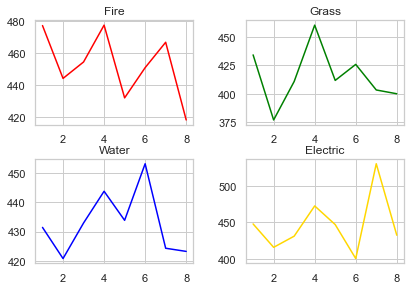

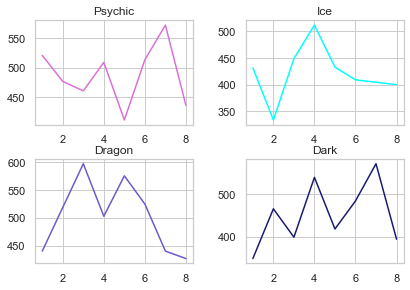

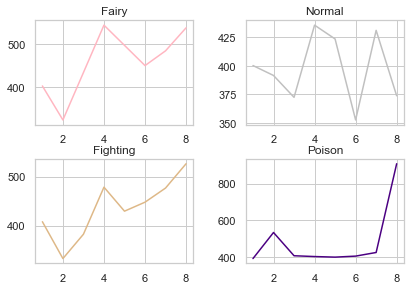

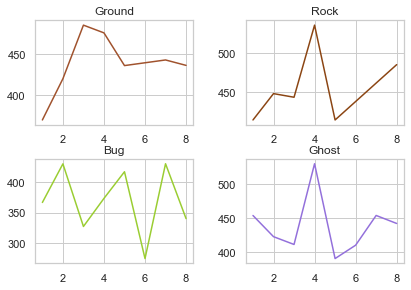

In [128]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Fire, color='red')
axs[0,0].set_title('Fire')
axs[0,1].plot(type1_avg.Grass, color='green')
axs[0,1].set_title('Grass')
axs[1,0].plot(type1_avg.Water, color='blue')
axs[1,0].set_title('Water')
axs[1,1].plot(type1_avg.Electric, color='gold')
axs[1,1].set_title('Electric')

fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Psychic, color='orchid')
axs[0,0].set_title('Psychic')
axs[0,1].plot(type1_avg.Ice, color='cyan')
axs[0,1].set_title('Ice')
axs[1,0].plot(type1_avg.Dragon, color='slateblue')
axs[1,0].set_title('Dragon')
axs[1,1].plot(type1_avg.Dark, color='midnightblue')
axs[1,1].set_title('Dark')

fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Fairy, color='lightpink')
axs[0,0].set_title('Fairy')
axs[0,1].plot(type1_avg.Normal, color='silver')
axs[0,1].set_title('Normal')
axs[1,0].plot(type1_avg.Fighting, color='burlywood')
axs[1,0].set_title('Fighting')
axs[1,1].plot(type1_avg.Poison, color='indigo')
axs[1,1].set_title('Poison')


fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Ground, color='sienna')
axs[0,0].set_title('Ground')
axs[0,1].plot(type2_avg.Rock, color='saddlebrown')
axs[0,1].set_title('Rock')
axs[1,0].plot(type1_avg.Bug, color='yellowgreen')
axs[1,0].set_title('Bug')
axs[1,1].plot(type1_avg.Ghost, color='mediumpurple')
axs[1,1].set_title('Ghost')

INSIGHT NOTES:

Flying Types are the only type introduced in Generation 1
that was not a primary type for pokemon until Generation 5
in which we can see that Flying types had thier peak in overall stats.

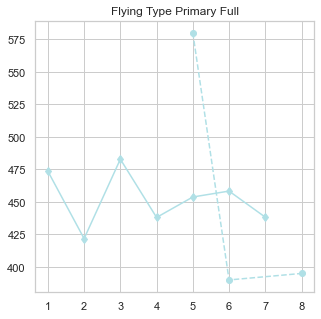

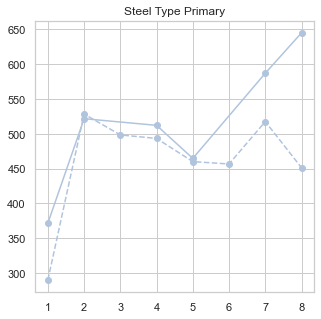

In [142]:
fig = plt.figure(figsize=(5,5))

plt.title('Flying Type Primary Full')

plt.plot(type1_avg.Flying, color='powderblue', linestyle='dashed', marker='o', label='Flying')
plt.plot(type2_avg.Flying, color='powderblue', linestyle='solid', marker='d', label='Flying')



fig = plt.figure(figsize=(5,5))

plt.title('Steel Type Primary')

plt.plot(type1_avg.Steel, color='lightsteelblue', linestyle='dashed', marker='o', label='Steel')
plt.plot(type2_avg.Steel, color='lightsteelblue', linestyle='solid', marker='o', label='Steel')


[Text(0, 0, 'Grass'),
 Text(1, 0, 'Fire'),
 Text(2, 0, 'Water'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'Normal'),
 Text(5, 0, 'Dark'),
 Text(6, 0, 'Poison'),
 Text(7, 0, 'Electric'),
 Text(8, 0, 'Ground'),
 Text(9, 0, 'Ice'),
 Text(10, 0, 'Fairy'),
 Text(11, 0, 'Steel'),
 Text(12, 0, 'Fighting'),
 Text(13, 0, 'Psychic'),
 Text(14, 0, 'Rock'),
 Text(15, 0, 'Ghost'),
 Text(16, 0, 'Dragon'),
 Text(17, 0, 'Flying')]

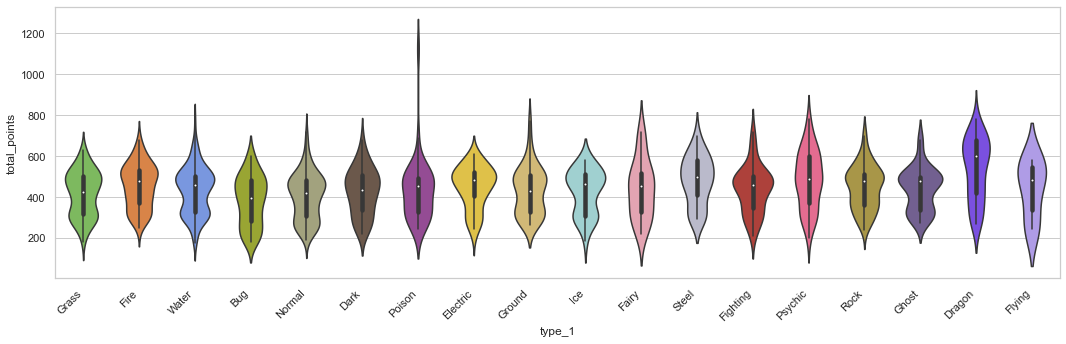

In [143]:
# Color Orient the types
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#705746',  # Dark
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#98D8D8',  # Ice
                    '#EE99AC',  # Fairy
                    '#B7B7CE',  # Steel
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#7038F8',  # Dragon
                    '#A98FF3',  # Flying
                   ]

plt.figure(figsize=(18,5))
chart = sns.violinplot(x = 'type_1',
                       y = 'total_points',
                       data = pokedex,
                       palette = pkmn_type_colors)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right')